# Assessment for Computer Infrastructure

## Problem 1: 
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks.

According to the [documentation](https://pypi.org/project/yfinance/), yfinance "offers a Pythonic way to fetch financial & market data from Yahoo!Ⓡ finance"

In [1]:
# import
import yfinance as yf


In order to create a file name with a date or time, we need the [datetime](https://www.geeksforgeeks.org/python/how-to-create-filename-containing-date-or-time-in-python/) module. 

In [2]:
# import datetime
from datetime import datetime 

This code is a quick check on the method of getting the datetime in the right format. Leave it commented out unless you want to carry out the check. 

In [3]:
#current_datetime = datetime.now().strftime("%Y%m%d-%H%M%S")
#print(current_datetime)

Next, build a function that that downloads all hourly data for the previous five days for the five FAANG stocks: Meta, Apple, Amazon, Netflix, and Google.The function will save the data into a folder called data in the root of my repository using a filename with the format YYYYMMDD-HHmmss.csv

In [ ]:
# create a function as per https://www.geeksforgeeks.org/python/python-functions/ 
def get_data():

    # Access multiple tickers as per documentation (https://ranaroussi.github.io/yfinance/reference/index.html).
    # adapted code on importing historical data from here: https://rowzero.io/blog/yfinance 
    # specific valid intervals found here: https://medium.com/@anjalivemuri97/day-4-fetching-historical-stock-data-with-yfinance-f45f3bd8b9c6 
    data = yf.download("META AAPL AMZN NFLX GOOG", period="5d", group_by= 'Ticker', interval='1h')

    # flatten the multi-level columns so the csv is very easy to read for analysis (see old files for errors). 
    # Adapted from: https://stackoverflow.com/questions/63107594/how-to-deal-with-multi-level-column-names-downloaded-with-yfinance/63107801#63107801
    data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

    #create the time stamp that can dynamically name the file (tested above).
    current_datetime = datetime.now().strftime("%Y%m%d-%H%M%S")

    # convert the output into a string so we can use it in a file name.
    current_datetime_str = str(current_datetime)

    # name the file with .csv extension so it saves as a csv file.
    file_name = current_datetime_str + ".csv"

    file_path = "data/"

    # save df to a csv: https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/ 
    data.to_csv(file_path + file_name)

    # return the DataFrame for further use
    return data
    

In [29]:
# save the result of the function to data so i can check it. 
data = get_data()
# check it returns something (i.e doesn't say None)
print(data)

/tmp/ipykernel_12178/2329270529.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("META AAPL AMZN NFLX GOOG", period="5d", group_by= 'Ticker', interval='1h')
[*********************100%***********************]  5 of 5 completed

Price                     Ticker         Open         High          Low  \
Date                                                                      
2025-10-29 13:30:00+00:00   AAPL   269.274994   271.410004   268.700012   
2025-10-29 13:30:00+00:00   AMZN   231.671997   232.809998   227.759995   
2025-10-29 13:30:00+00:00   GOOG   268.605011   270.959991   268.429993   
2025-10-29 13:30:00+00:00   META   754.750000   759.155029   745.140015   
2025-10-29 13:30:00+00:00   NFLX  1099.099976  1108.229980  1096.000000   
...                          ...          ...          ...          ...   
2025-11-04 17:30:00+00:00   AAPL   270.005005   270.720001   269.890015   
2025-11-04 17:30:00+00:00   AMZN   250.929993   251.250000   250.479996   
2025-11-04 17:30:00+00:00   GOOG   278.239990   278.260010   277.350006   
2025-11-04 17:30:00+00:00   META   631.525024   631.744995   628.700012   
2025-11-04 17:30:00+00:00   NFLX  1095.010010  1095.660034  1092.250000   

Price                   


/tmp/ipykernel_12178/2329270529.py:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)


## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

We need to import the os library for this next step. The os library allos you to interact with operating system, and the [os.path.getctime](https://www.geeksforgeeks.org/python/python-os-path-getctime-method/) will find the creation time (ctime) of the specificed file path.

We will also use the glob library. The [glob](https://builtin.com/software-engineering-perspectives/glob-in-python) library "is used to return all file paths names that match a specific pattern". In this case, we're going to look for csv files in the data folder.

In [32]:
# import os 
import os 
import glob
import pandas as pd
import seaborn as sns

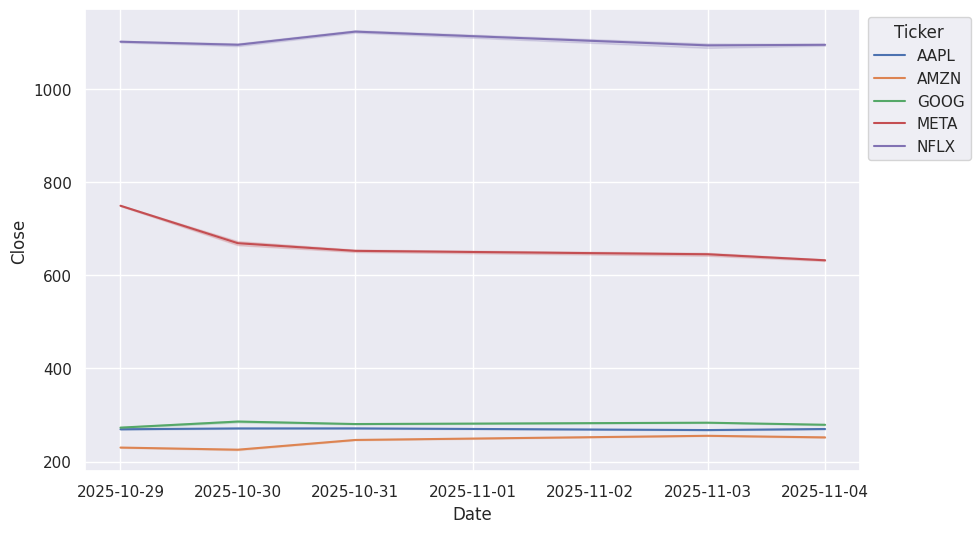

In [47]:
# code adapted from this youtube video on how to get files based on cration or modification time https://www.youtube.com/watch?v=Fbv5Y337DdM&t=105s  
# Get a list of all CSV files in the 'data' folder.
# The '*.csv' pattern ensures only CSV files are included
list_of_files = glob.glob('data/*.csv')

# get the latest file created using max.
latest_file = max(list_of_files, key=os.path.getctime)

#open the latest file by reading as csv https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html 
df = pd.read_csv(latest_file)

# Convert to datetime and keep only the date part. see https://www.askpython.com/python/examples/extracting-date-from-datetime 
df['Date'] = pd.to_datetime(df['Date']).dt.date

# set the size of the figure: https://how.dev/answers/how-to-change-the-figure-size-in-seaborn
width = 10
height = 6
sns.set_theme(rc = {'figure.figsize':(width, height)})

# adjust the font: https://www.geeksforgeeks.org/data-visualization/how-to-change-label-font-sizes-in-seaborn/ 
sns.set_theme(font_scale=1.0)

# plot the line setting date on the x axis, close prices on y, and use hue to include all tickers. see: https://seaborn.pydata.org/generated/seaborn.lineplot.html 
ax = sns.lineplot(data=df, x="Date", y="Close", hue='Ticker')
# move the legend outside the plot to avoid overlap: https://seaborn.pydata.org/generated/seaborn.move_legend.html 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


